**Multiple** **Linear** **Regression**- **Economics** **Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
rawdata = files.upload()

Saving economic_index.csv to economic_index.csv


In [29]:
df=pd.read_csv("economic_index.csv")
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [30]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [31]:
df.tail()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
19,19,2016,5,1.75,6.1,866
20,20,2016,4,1.75,5.9,876
21,21,2016,3,1.75,6.2,822
22,22,2016,2,1.75,6.2,704
23,23,2016,1,1.75,6.1,719


In [32]:
df.shape

(24, 6)

In [33]:
df.columns

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.2 KB


In [37]:
df.describe()

,interest_rate,unemployment_rate,index_price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


In [35]:
#drop unneccessary columns
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [39]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [41]:
#check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

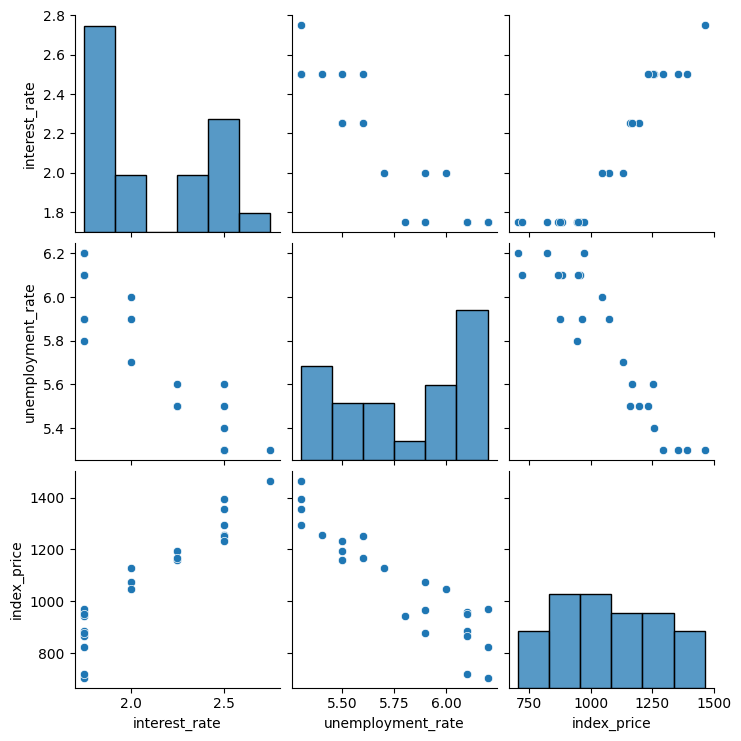

In [43]:
#  visualization
import seaborn as sns
sns.pairplot(df)

<Axes: >

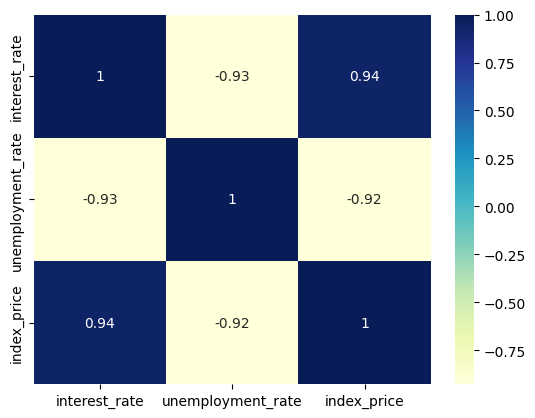

In [46]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

In [49]:
#independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [50]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [51]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [57]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train

array([[-1.01512945,  0.39413171],
       [-1.01512945,  0.98532928],
       [-1.01512945,  1.28092806],
       [ 0.3904344 , -0.78826342],
       [ 1.09321633, -0.78826342],
       [-1.01512945,  0.98532928],
       [ 1.09321633, -1.08386221],
       [ 1.09321633, -1.37946099],
       [ 1.09321633, -0.49266464],
       [-1.01512945,  0.98532928],
       [ 0.3904344 , -0.49266464],
       [ 0.3904344 , -0.78826342],
       [-1.01512945,  0.98532928],
       [ 1.09321633, -1.37946099],
       [ 1.79599826, -1.37946099],
       [-1.01512945,  1.28092806],
       [-1.01512945,  0.98532928],
       [-0.31234752,  0.68973049]])

In [61]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [62]:
# prediction
y_pred=regression.predict(X_test)
y_pred

array([1089.17624198, 1127.99283867,  899.44410498,  977.07729837,
        957.66900002, 1468.64051598])

In [64]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8634.281192947814
67.00238710853853
92.92083293292099


In [65]:
score=r2_score(y_test,y_pred)
print(score)


0.8159795332585089
